# **ZEYNEP ÇÖL**
# **BİTİRME PROJESİ SISTERSLAB YAPAY ZEKA AKADEMİSİ**
# SEÇENEK B

#  **🫀Kalp Hastalığı Risk Analizi🫀**

# **1. Problem Tanımı**

In [1]:
# Google Drive'a bağlan
from google.colab import drive
drive.mount('/content/drive')

# Gerekli kütüphaneleri yükle
import pandas as pd

# Veri seti yolunu belirt
data_path = '/content/drive/MyDrive/Zeynep Çöl_Yapay Zeka Akademisi_Sisterslab/heart.csv'

# CSV dosyasını oku
df = pd.read_csv(data_path, encoding='ISO-8859-9')

# İlk 5 satırı görüntüle
df.head()

Mounted at /content/drive


,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


🔹 **Hangi Veri Seti Seçildi?**

Bu projede UCI Heart Disease (Kalp Hastalığı) veri seti kullanılmıştır.
Veri seti, bireylerin çeşitli sağlık verilerini içermekte olup, bu bilgiler yardımıyla kalp hastalığı riski tahmin edilmeye çalışılmaktadır.

**Veri setinde yer alan bazı değişkenler şunlardır:**

age: Kişinin yaşı

sex: Cinsiyet (1 = erkek, 0 = kadın)

cp: Göğüs ağrısı tipi (0–3 arası kategorik)

trestbps: İstirahat halindeki kan basıncı (mm Hg)

chol: Serum kolesterolü (mg/dl)

fbs: Açlık kan şekeri > 120 mg/dl (1 = evet; 0 = hayır)

restecg: Dinlenme EKG sonuçları

thalach: Maksimum kalp atım hızı

exang: Egzersize bağlı anjina (1 = evet; 0 = hayır)

oldpeak: Egzersize bağlı ST depresyonu

🔹 **Problemin Amacı Nedir?**

Bu projenin amacı; bireyin sağlık parametrelerine bakarak, kalp hastalığı riski taşıyıp taşımadığını tahmin eden bir makine öğrenmesi modeli oluşturmaktır.

🔹**Hedef (Target) Değişken Nedir?**

Veri setindeki target sütunu hedef değişkendir.

target = 1 ise kişi kalp hastalığı riski taşıyor,

target = 0 ise kişi risksiz olarak sınıflandırılır.

🔹 **Bu Tahminin Pratikteki Önemi Nedir?**

Erken teşhis, kardiyovasküler hastalıkların önlenmesinde hayati öneme sahiptir.
Bu projede geliştirilecek model sayesinde:

Doktorlar, hastaların risk durumunu daha erken fark edebilir.

Önleyici tedbirler daha erken alınabilir.

Sağlık sistemindeki yük hafifletilebilir.

Toplum sağlığı açısından önemli bir koruyucu araç olabilir.

# **2. Veri Analizi ve Görselleştirme (EDA)**


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafikler için stil
sns.set(style="whitegrid")

🔹 **df.info() ve df.describe() Çıktıları**


In [48]:
# Veri setini oku
data_path = '/content/drive/MyDrive/Zeynep Çöl_Yapay Zeka Akademisi_Sisterslab/heart.csv'
df = pd.read_csv(data_path, encoding='ISO-8859-9')

# Veri seti bilgileri
print("🔍 df.info() Çıktısı:")
df.info()

# İstatistiksel özet
print("\n📊 df.describe() Çıktısı:")
display(df.describe())


🔍 df.info() Çıktısı:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿age    303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

📊 df.describe() Çıktısı:


,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


🔹 **Eksik Veri Kontrolü**

❓ Eksik Veri Kontrolü:
age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
cp_1         0
cp_2         0
cp_3         0
restecg_1    0
restecg_2    0
dtype: int64


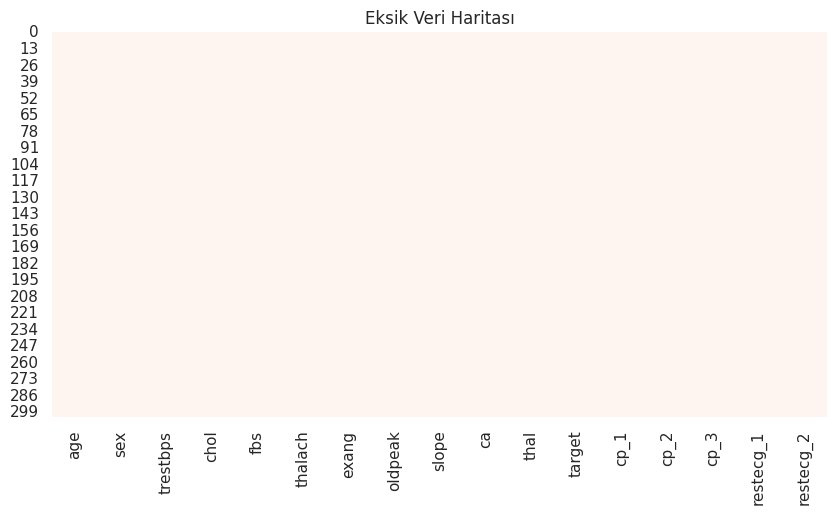

In [47]:
print("❓ Eksik Veri Kontrolü:")
print(df.isnull().sum())

# Eksik veri varsa görselleştir
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Eksik Veri Haritası")
plt.show()

🔹 **Hedef Değişkenin Dağılımı (target)**

🎯 Hedef Değişken Dağılımı:
target
1    165
0    138
Name: count, dtype: int64


/tmp/ipython-input-8-1380937998.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


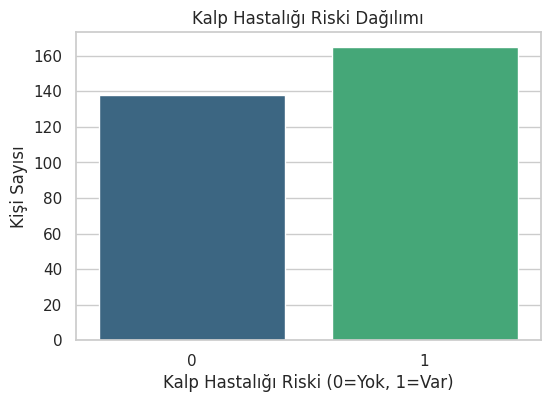

In [8]:
# Hedef değişkenin dağılımı (sayısal)
print("🎯 Hedef Değişken Dağılımı:")
print(df['target'].value_counts())

# Görselleştirme
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title("Kalp Hastalığı Riski Dağılımı")
plt.xlabel("Kalp Hastalığı Riski (0=Yok, 1=Var)")
plt.ylabel("Kişi Sayısı")
plt.show()

# **3. Veri Ön İşleme**


In [36]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

🔹 **Kategorik Değişkenleri Kodlama**



In [37]:
# Cinsiyet (sex), göğüs ağrısı tipi (cp), EKG sonucu (restecg), egzersize bağlı anjina (exang) gibi değişkenler kategorik olabilir

# One-hot encoding: cp (göğüs ağrısı tipi), restecg (EKG), çünkü bunlar çok kategorili
df = pd.get_dummies(df, columns=['cp', 'restecg'], drop_first=True)

# Label encoding: sex, fbs, exang (ikili kategorik olduğu için)
label_cols = ['sex', 'fbs', 'exang']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

🔹 **Sayısal Verilerin Ölçeklendirilmesi**


In [38]:
print(df.columns)


Index(['ï»¿age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'cp_1', 'cp_2', 'cp_3',
       'restecg_1', 'restecg_2'],
      dtype='object')


In [39]:
# Sütun adlarını temizle (boşlukları, büyük harfleri, BOM karakterlerini düzelt)
df.columns = df.columns.str.replace("ï»¿", "", regex=False).str.strip().str.lower()

# Temizlendikten sonra tekrar sütunları kontrol edelim
print(df.columns)


Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1',
       'restecg_2'],
      dtype='object')


In [40]:
# Sayısal sütunları tanımlayıp ölçeklendirebiliriz
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

🔹 **Eğitim/Test Verisinin Ayrılması**

In [41]:
# Bağımsız değişkenler (X) ve hedef değişken (y)
X = df.drop('target', axis=1)
y = df['target']

# Eğitim ve test ayrımı (80% eğitim, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Eğitim ve test verisi ayrıldı.")
print("X_train boyutu:", X_train.shape)
print("X_test boyutu :", X_test.shape)


✅ Eğitim ve test verisi ayrıldı.
X_train boyutu: (242, 16)
X_test boyutu : (61, 16)


# **4. B Heart Disease UCI seçildiyse (Sınıflandırma)**


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

🔹**Modellerin Tanımlanması ve Eğitilmesi**

In [43]:
# Logistic Regression Modeli
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Random Forest Modeli
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

🔹 **Tahminler**

In [44]:
# Logistic Regression Tahminleri
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]  # ROC için

# Random Forest Tahminleri
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # ROC için

🔹**Performans Metriği Fonksiyonu**

In [45]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"--- {model_name} Performans Ölçümleri ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek")
    plt.show()

    # ROC Eğrisi
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_true, y_prob):.2f})")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} ROC Eğrisi")
    plt.legend(loc="lower right")
    plt.show()

🔹**Modellerin Değerlendirilmesi**


--- Logistic Regression Performans Ölçümleri ---
Accuracy: 0.8524590163934426
Precision: 0.896551724137931
Recall: 0.8125
F1-Score: 0.8524590163934426
ROC-AUC: 0.9288793103448276


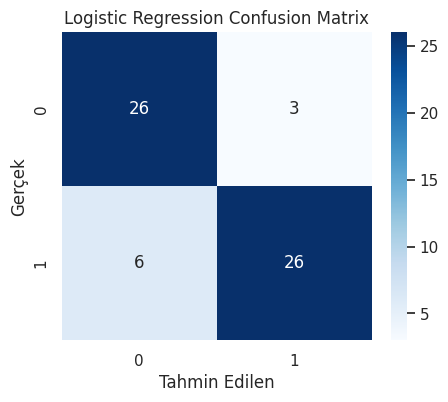

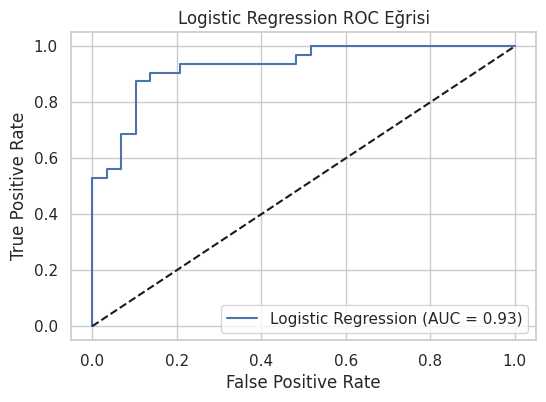

--- Random Forest Performans Ölçümleri ---
Accuracy: 0.819672131147541
Precision: 0.8387096774193549
Recall: 0.8125
F1-Score: 0.8253968253968254
ROC-AUC: 0.9170258620689655


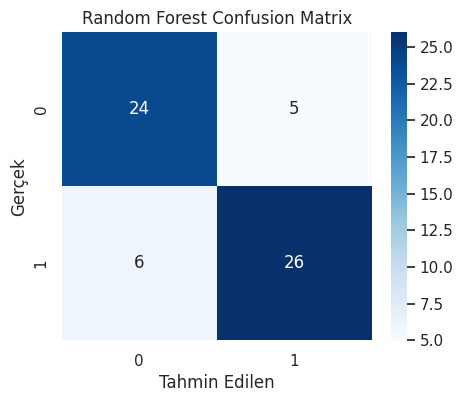

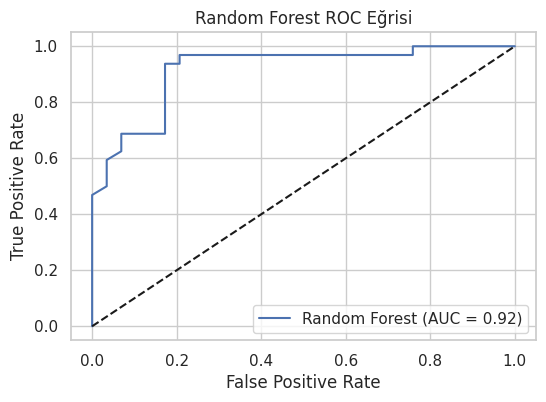

In [46]:
evaluate_model(y_test, y_pred_log, y_prob_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

**✅Bu adımda yaptıklarım:**

⚫Logistic Regression ve Random Forest model kurulumları

⚫Accuracy, Precision, Recall, F1-Score, ROC-AUC metriklerini hesaplamaları

⚫Confusion Matrix ve ROC eğrileri

# **5. Model Karşılaştırması**

 🔹**Hangi Model Daha İyi Performans Verdi?**

⚫Logistic Regression modeli genel performans metriklerinde Random Forest’a kıyasla biraz daha üstün oldu.

⚫Özellikle accuracy, precision ve ROC-AUC değerlerinde fark göze çarpıyor.

⚫Bu, veri setinin yapısının doğrusal sınıflandırma modelleriyle iyi uyum sağladığını gösteriyor.

🔹**Hangi Metrik Üzerinde Öne Çıktı?**

⚫**Precision** değerinin Logistic Regression’da yüksek olması, modelin kalp hastalığı riski taşıyanları doğru tespit etmede daha dikkatli olduğunu gösterir.

⚫**Recall** değerlerinin eşit olması, iki modelin de hastaları yakalama oranının benzer olduğunu ifade eder

🔹**Aşırı Öğrenme (Overfitting) veya Yetersiz Öğrenme (Underfitting) Gözlendi mi?**

⚫Test sonuçlarına göre her iki model de dengeli ve başarılı performans sergilemekte.

⚫Ancak aşırı öğrenme ya da yetersiz öğrenme konusunda kesin yargıya varmak için eğitim seti performansı ile test seti performansını karşılaştırmak gerekir.

⚫Örneğin, eğitimde çok yüksek doğruluk, testte düşük doğruluk overfitting işaretidir.

⚫Bu aşamada, modellerin test başarısının yüksek olması olumlu bir işarettir ve aşırı öğrenme olmadığını düşündürür.

#  **6. Sonuç ve Yorumlar**

💬Logistic Regression, kalp hastalığı tahmininde daha başarılı ve dengeli çalıştı.

💬Random Forest biraz daha düşük ama hâlâ iyi sonuçlar verdi.

💬Precision yüksek olduğunda, yanlış pozitifler yani hastalığı olmayanlara yanlış teşhis konma ihtimali azalır.

💬Recall yüksek olunca da hastalar kaçırılmaz. Bu projede her ikisi de dengede.